In [2]:
from scpviz import pAnnData as pAnnData
from scpviz import plotting as scplt
from scpviz import utils as scutils
import scanpy as sc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks')

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

In [3]:
obs_columns = ['sample', 'cellline', 'treatment']

pdata_nb = pAnnData.import_proteomeDiscoverer(prot_file = 'pd_prot.txt', pep_file = 'pd_pep.txt',obs_columns=obs_columns)

--------------------------
Starting import...
--------------------------
Source file: pd_prot.txt / pd_pep.txt
Number of files: 12
Proteins: 4988
Peptides: 30920

🔍 25 proteins with missing gene names. Querying UniProt...
✅ Recovered 24 gene names from UniProt.
⚠️ 1 gene names still missing. Assigned as 'UNKNOWN_<accession>' for:
    Q6ZSR9
💡 You can update these using `pdata.update_identifier_maps({'GENE': 'ACCESSION'}, on='protein', direction='reverse', overwrite=True)`

ℹ️  RS matrix: (4988, 30920) (proteins × peptides), sparsity: 99.98%
   - Proteins with ≥2 *unique* linked peptides: 3762/4988
   - Peptides linked to ≥2 proteins: 1677/30920
   - Mean peptides per protein: 6.63
   - Mean proteins per peptide: 1.07
✅ pAnnData object is valid.
--------------------------
✅ Import complete. Use `print(pdata)` to view the object.


Filtered by exact match on: {'cellline': 'AS', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
Filtered by exact match on: {'cellline': 'AS', 'treatment': 'sc'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
✅ Differential expression complete: [{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'AS', 'treatment': 'sc'}] | Method: ttest, FC: pairwise_median


<Axes: xlabel='$log_{2}$ fold change', ylabel='-$log_{10}$ p value'>

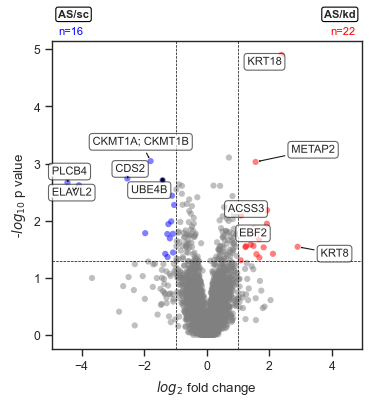

In [4]:
case1 = {'cellline': 'AS', 'treatment': 'kd'}
case2 = {'cellline': 'AS', 'treatment': 'sc'}
case_values = [case1, case2]

fig, ax = plt.subplots(figsize=(4, 4))
ax, volcano_df = scplt.plot_volcano(ax, pdata_nb, values = case_values, pval = 0.05, return_df=True, fold_change_mode='pairwise_median')
ax = scplt.mark_volcano(ax, volcano_df, label=['UBE4B'], label_color="black", show_names=False)
ax
# ax.figure.savefig('AS volcano.png', dpi=300, bbox_inches='tight')
# volcano_df.to_csv('AS volcano.csv')

In [6]:
case1 = {'cellline': 'BE', 'treatment': 'kd'}
case2 = {'cellline': 'BE', 'treatment': 'sc'}
case_values = [case1, case2]

pdata_nb.de(values = case_values, fold_change_mode='pairwise_median')

case1 = {'cellline': 'AS', 'treatment': 'kd'}
case2 = {'cellline': 'BE', 'treatment': 'kd'}
case_values = [case1, case2]

pdata_nb.de(values = case_values, fold_change_mode='pairwise_median')

Filtered by exact match on: {'cellline': 'BE', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
Filtered by exact match on: {'cellline': 'BE', 'treatment': 'sc'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
✅ Differential expression complete: [{'cellline': 'BE', 'treatment': 'kd'}] vs [{'cellline': 'BE', 'treatment': 'sc'}] | Method: ttest, FC: pairwise_median
Filtered by exact match on: {'cellline': 'AS', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
Filtered by exact match on: {'cellline': 'BE', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
✅ Differential expression complete: [{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'BE', 'treatment': 'kd'}] | Method: ttest, FC: pairwise_median


,Genes,"[{'cellline': 'AS', 'treatment': 'kd'}]","[{'cellline': 'BE', 'treatment': 'kd'}]",log2fc,p_value,test_statistic,-log10(p_value),significance_score,significance
Q9C004,SPRY4,5.165350e+06,1.207719e+06,2.288941,0.000044,19.154305,4.358765,9.976954,upregulated
O15533,TAPBP,1.120647e+06,4.999403e+05,1.191905,0.017767,3.884893,1.750377,2.086282,upregulated
Q08257,CRYZ,3.056439e+07,1.105781e+07,1.614564,0.001811,7.364639,2.742036,4.427192,upregulated
P06756,ITGAV,5.768841e+06,2.331006e+06,1.320209,0.018216,3.85554,1.739539,2.296555,upregulated
P16083,NQO2,1.290896e+06,4.215376e+05,1.455954,0.000847,8.990359,3.071955,4.472626,upregulated
...,...,...,...,...,...,...,...,...,...
Q8IV48,ERI1,1.347173e+06,1.981607e+06,-0.548570,0.228849,-1.419191,0.640451,-0.351332,not significant
Q9BPX5,ARPC5L,2.025645e+06,1.283280e+06,0.671934,0.034343,3.155176,1.464165,0.983823,not significant
P78362-2,SRPK2,1.233297e+06,8.964325e+05,0.495791,0.399428,0.942222,0.398561,0.197603,not significant
Q8IZQ5,SELENOH,2.807093e+06,2.031270e+06,0.495304,0.21692,1.464471,0.663700,0.328734,not significant


In [7]:
pdata_nb.list_enrichments()


[STRING Enrichment Summary]

Available DE comparisons (not yet enriched):
  - AS_kd vs AS_sc
  - AS_kd vs BE_kd
  - BE_kd vs BE_sc
To run enrichment: pdata.enrichment_functional(from_de=True, de_key="...")

Completed STRING enrichment results:
  (none)


In [8]:
genelist = ['P55072', 'NPLOC4', 'UFD1 ', 'STX5A', 'NSFL1C ', 'UBXN2A', 'UBXN4', 'UBE4B', 'YOD1', 'WASHC5','PLAA','UBXN10']

pdata_nb.enrichment_functional(genes=genelist, from_de=False)

[WARNING] Could not resolve 'UFD1 ' to an accession — skipping.
[WARNING] Could not resolve 'STX5A' to an accession — skipping.
[WARNING] Could not resolve 'NSFL1C ' to an accession — skipping.
[WARNING] Could not resolve 'UBXN2A' to an accession — skipping.
[WARNING] Could not resolve 'YOD1' to an accession — skipping.
[WARNING] Could not resolve 'UBXN10' to an accession — skipping.
[INFO] Resolving STRING IDs for 6 identifiers...
[INFO] Found 0 cached STRING IDs. 6 need lookup.
[INFO] Querying STRING for batch 1 (6 identifiers)...
[INFO] Batch completed in 0.72s
[INFO] Cached 6 new STRING ID mappings.
[INFO] Running enrichment on 6 STRING IDs (species 9606)...
[INFO] Enrichment completed in 0.71s
[INFO] Stored enrichment and metadata under key: UserSearch1
[INFO] Access enrichment table: pdata.stats["UserSearch1"]
[INFO] To visualize in notebook: pdata.plot_enrichment_svg("UserSearch1")


,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description
0,COMPARTMENTS,GOCC:0036501,2,4,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",1.160000e-06,2.700000e-03,UFD1-NPL4 complex
1,COMPARTMENTS,GOCC:0034098,2,8,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",3.470000e-06,4.000000e-03,VCP-NPL4-UFD1 AAA ATPase complex
2,Process,GO:0030433,4,82,9606,"[9606.ENSP00000272638, 9606.ENSP00000331487, 9...","[UBXN4, NPLOC4, UBE4B, VCP]",5.040000e-09,7.900000e-05,Ubiquitin-dependent ERAD pathway
3,Process,GO:0043161,5,347,9606,"[9606.ENSP00000272638, 9606.ENSP00000331487, 9...","[UBXN4, NPLOC4, UBE4B, VCP, PLAA]",1.050000e-08,8.200000e-05,Proteasome-mediated ubiquitin-dependent protei...
4,Process,GO:0030970,2,17,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",1.320000e-05,1.380000e-02,"Retrograde protein transport, ER to cytosol"
...,...,...,...,...,...,...,...,...,...,...
106,PMID,PMID:25721663,2,3,9606,"[9606.ENSP00000343001, 9606.ENSP00000351777]","[UBE4B, VCP]",7.720000e-07,4.110000e-02,(2015) Characterization of C-terminal adaptors...
107,PMID,PMID:22505030,2,3,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",7.720000e-07,4.110000e-02,(2012) 40S subunit dissociation and proteasome...
108,RCTM,HSA-110320,2,19,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",1.620000e-05,3.690000e-02,Translesion Synthesis by POLH
109,NetworkNeighborAL,CL:4192,4,15,9606,"[9606.ENSP00000272638, 9606.ENSP00000331487, 9...","[UBXN4, NPLOC4, VCP, PLAA]",9.250000e-12,4.230000e-08,Domain present in ubiquitin-regulatory protein...


In [ ]:
https://string-db.org/help/api/#linking-to-the-search-results-page